<a href="https://colab.research.google.com/github/cytoscape/cytoscape-automation/blob/master/for-scripters/Python/basic-data-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Data Visualization
Kozo Nishida and Barry Demchak

2021-01-31

**Cytoscape is an open source software platform for integrating, visualizing, and analyzing measurement data in the context of networks.**

This tutorial presents a scenario of how expression and network data can be combined to tell a biological story and includes these concepts:

*   Visualizing networks using expression data.
*   Filtering networks based on expression data.
*   Assessing expression data in the context of a biological network.

## Installation

First, launch [Cytoscape Desktop](https://cytoscape.org/) and install the [FileTransfer App](http://apps.cytoscape.org/apps/filetransfer).

Then run the following chunk of code below to install the `py4cytoscape` module.


In [ ]:
%%capture
!python3 -m pip install python-igraph requests pandas networkx
!python3 -m pip install py4cytoscape
import IPython
import py4cytoscape as p4c

If you are using a remote notebook environment such as Google Colab, please execute the cell below. (If you're running on your local notebook, you don't need to do that.)



In [ ]:
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

In [ ]:
p4c.cytoscape_version_info()

In [ ]:
p4c.sandbox_get_file_info('.')

## Loading Network

You can download the [demo network session file](https://nrnb.org/data/BasicDataVizDemo.cys) to your current working directory by running…

In [ ]:
!curl -O https://nrnb.org/data/BasicDataVizDemo.cys

Now open the demo network using…

In [ ]:
p4c.sandbox_send_to("BasicDataVizDemo.cys")

In [ ]:
p4c.open_session(file_location="BasicDataVizDemo.cys")

Now you should see a network like this.

In [ ]:
p4c.export_image(filename="BasicDataVizDemo.png")

In [ ]:
p4c.sandbox_get_from("BasicDataVizDemo.png")
from IPython.display import Image
Image('BasicDataVizDemo.png')

## Visualizing Expression Data on Networks

Probably the most common use of expression data in Cytoscape is to set the **visual properties** of the nodes (color, shape, border) in a network according to expression data. This creates a powerful visualization, portraying functional relation and experimental response at the same time. Here, we will show an example of doing this.

The data used in this example is from yeast, and represents an experiment of perturbations of the genes **Gal1**, **Gal4**, and **Gal80**, which are all yeast transcription factors. For this tutorial, the experimental data was part of the Cytoscape session file you loaded earlier, and is visible in the Node Table:

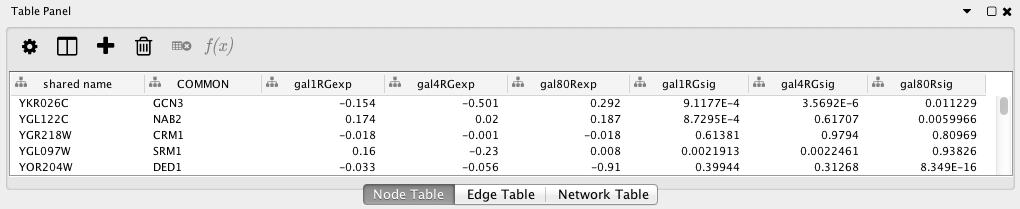

*   You can select nodes in the network by

In [ ]:
p4c.select_nodes(['YDL194W', 'YLR345W'], by_col='name')

*   Selecting one or more nodes in the network will update the Node Table to show only the corresponding row(s).

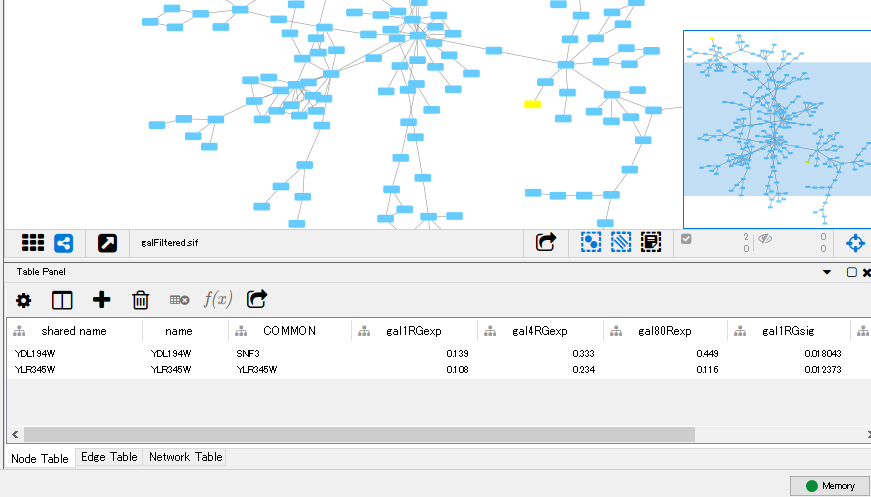


We can now use the data to manipulate the visual properties of the network by mapping specific data columns to visual style properties:

*   The **gal80Rexp** expression values will be mapped to node color; nodes with low expression will be colored blue, nodes with high expression will be colored red.
*   Significance for expression values will be mapped to Node Border Width, so nodes with significant changes will appear with a thicker border.

## Set Node Fill Color

*   Click on the **Style** tab in the Control Panel. And you can set node fill color by



In [ ]:
p4c.set_node_color_mapping(**p4c.gen_node_color_map('gal80Rexp'))

*   This produces an initial gradient ranging from blue to red for expression values. Notice that the nodes in the network change color.

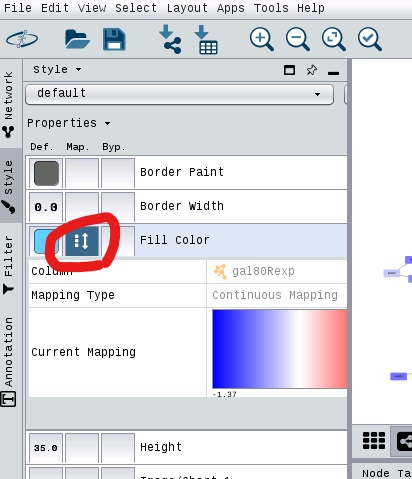

The background of the cells in the gal80RExp column is now colored in the same way that the nodes in the network are colored.

## Set Default Node Color

Some nodes in the network don’t have any data, and for those nodes, the default color applies. In our case, the default color is blue, which falls within the spectrum of our blue-red gradient. This is not ideal for data visualization, so a useful trick is to choose a color outside the gradient spectrum to distinguish nodes with no defined expression value.

*   Still in the **Style** tab, And you can set default node color to dark gray by




In [ ]:
p4c.set_node_color_default('#666666')

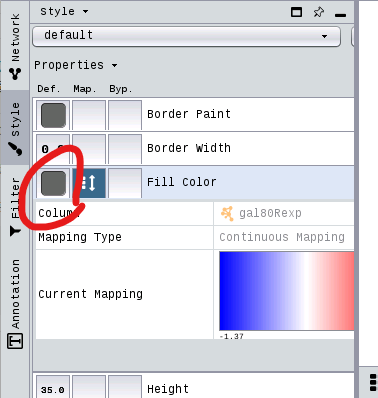

## Set Node Border Width

You can set the Border Width by

In [ ]:
p4c.set_node_border_width_mapping(**p4c.gen_node_width_map('gal80Rsig'))

This defines the node border width over the range of gal80Rsig column p-values like

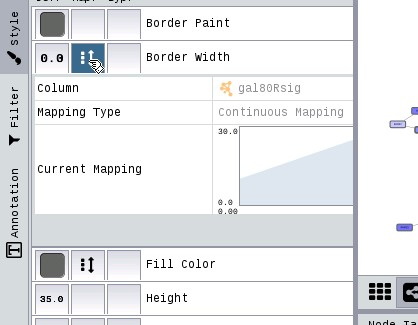

Double-clicking on the diagonal graph to the right of Current Mapping will bring up a window similar to the one below.

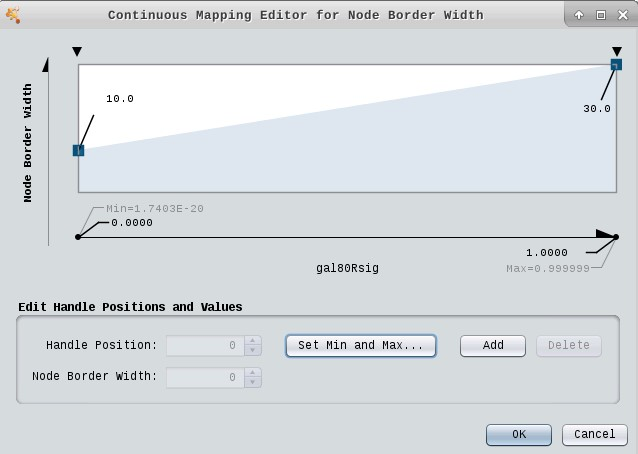

## Layouts

An important aspect of network visualization is the layout, meaning the positioning of nodes and edges. Our network had a preset layout in the original file you imported, but this can be changed.

*   Let’s change the layout to **Degree Sorted Circle Layout** by

In [ ]:
p4c.layout_network('degree-circle')

In [ ]:
p4c.export_image(filename='degree-circle.png')
p4c.sandbox_get_from('degree-circle.png')
Image('degree-circle.png')

In this layout, nodes are sorted by degree (connectedness), with the highest degree node at the 6 o’clock position, and remaining nodes are sorted counter clock-wise based on decreasing degree.

For this network, a degree-sorted circle layout may not be the most effective. Instead, let’s try a force-directed layout instead, which may work better with this network.

In [ ]:
p4c.layout_network('force-directed')

In [ ]:
p4c.export_image(filename='force-directed.png')
p4c.sandbox_get_from('force-directed.png')
Image('force-directed.png')

Cytoscape supports many different layout algorithms, described in detail in the [Cytoscape manual](http://manual.cytoscape.org/en/stable/Navigation_and_Layout.html?highlight=layout#automatic-layout-algorithms).

## Select Nodes

Cytoscape allows you to easily filter and select nodes and edges based on data attributes. Next, we will select a subset of nodes with high expression in the gal80 knockout:

*   Let’s create column filter for **Node: gal80Rexp** by

In [ ]:
p4c.create_column_filter('myFilter', 'gal80Rexp', 2.00, "GREATER_THAN")

You should now see only a few nodes in the network selected (highlighted yellow).

In [ ]:
p4c.export_image(filename='column-filter.png')
p4c.sandbox_get_from('column-filter.png')
Image('column-filter.png')

## Expand Selection and Create New Network

We have now selected only the few top expressing nodes. To see the context of these nodes in the larger network, we can expand the selection of nodes to include the nodes connecting to the selected nodes, i.e. the first neighbors. Once we have that larger selection, we can create a new network.

*   Select the first neighbors of selected nodes by

In [ ]:
p4c.select_first_neighbors()

In [ ]:
p4c.export_image(filename='first-neighbors.png')
p4c.sandbox_get_from('first-neighbors.png')
Image('first-neighbors.png')

Digging into the biology of this network, it turns out that GAL4 is repressed by GAL80. Both nodes (GAL4 and GAL11) show fairly small changes in expression, and neither change is statistically significant: they are pale blue with thin borders. These slight changes in expression suggest that the critical change affecting the red nodes might be somewhere else in the network, and not either of these nodes. GAL4 interacts with GAL80, which shows a significant level of repression: it is medium blue with a thicker border.

Note that while GAL80 shows evidence of significant repression, most nodes interacting with GAL4 show significant levels of induction: they are rendered as red rectangles. GAL11 is a general transcription co-factor with many interactions.

Putting all of this together, we see that the ___transcriptional activation activity of Gal4 is repressed by Gal80___. So, repression of Gal80 increases the transcriptional activation activity of Gal4. Even though the expression of Gal4 itself did not change much, ___the Gal4 transcripts were much more likely to be active transcription factors when Gal80 was repressed___. This explains why there is so much up-regulation in the vicinity of Gal4.

## Summary

In summary, we have:

*   Explored a yeast interactome from a transcription factor knockout experiment
*   Created a visual style using expression value as node color and with border width mapped to significance
*   Selected high expressing genes and their neighbors and created a new network

Finally, we can now export this network as a publication-quality image….


## Saving Results

Cytoscape provides a number of ways to save results and visualizations:

*   As a session:

In [ ]:
p4c.save_session('basic-data-visualization.cys')

*   As an image:

In [ ]:
p4c.export_image('basic-data-visualization', type='PDF')

# You can export image in other formats.

#p4c.export_image('basic-data-visualization', type='PNG')
#p4c.export_image('basic-data-visualization', type='JPEG')
#p4c.export_image('basic-data-visualization', type='SVG')
#p4c.export_image('basic-data-visualization', type='PS')

*   To a public repository:

```
p4c.export_network_to_ndex('userid', 'password', True)
```

*   As a graph format file (Formats: “CX JSON”, “Cytoscape.js JSON”, “GraphML”, “XGMML”, “SIF”,…):

In [ ]:
p4c.export_network('basic-data-visualization', 'CX')

# You can export network in other graph formats.

#p4c.export_network('basic-data-visualization', 'cyjs')
#p4c.export_network('basic-data-visualization', 'graphML')
#p4c.export_network('basic-data-visualization', 'xGMML')
#p4c.export_network('basic-data-visualization', 'SIF')